/tmp/ipykernel_192908/1033713723.py:77: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


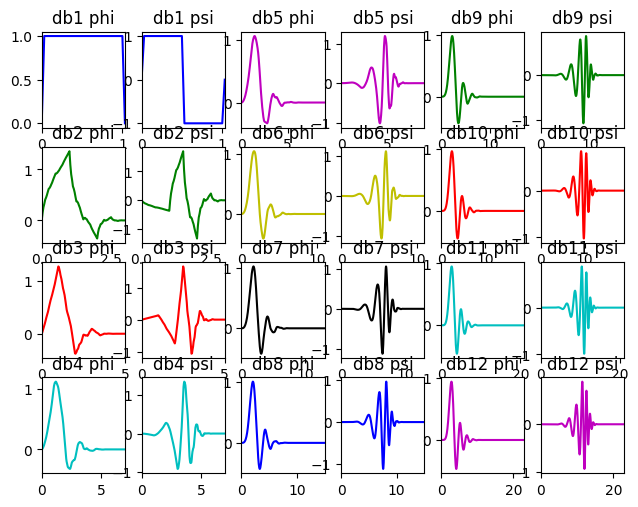

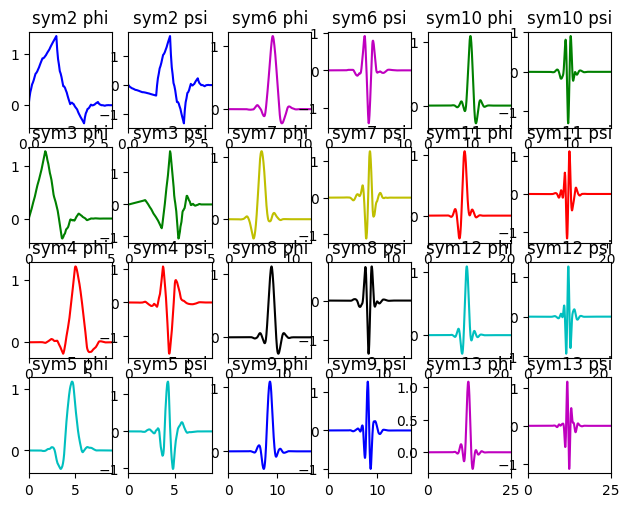

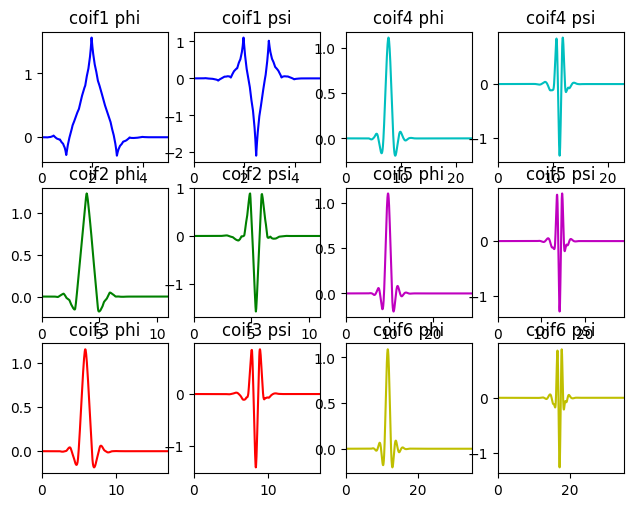

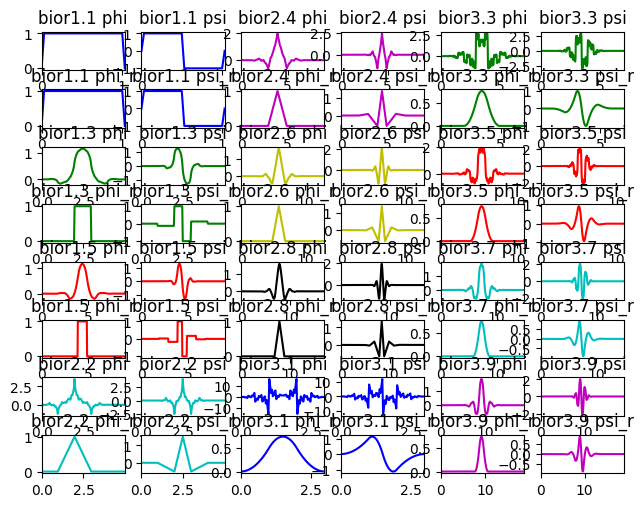

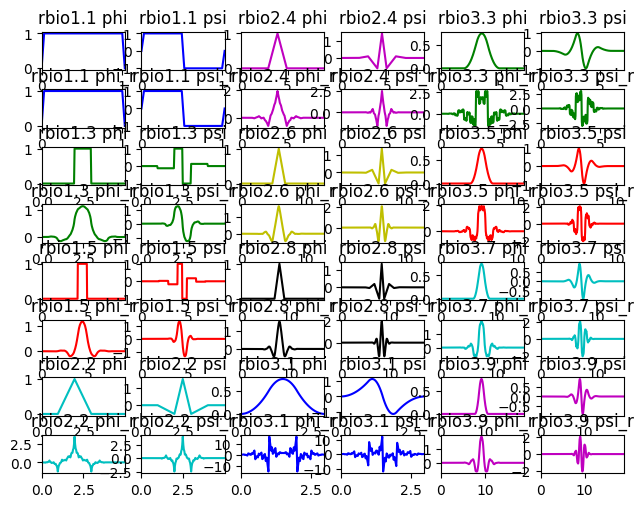

In [15]:
import itertools

import matplotlib.pyplot as plt

import pywt

plot_data = [("db", (4, 3)), ("sym", (4, 3)), ("coif", (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(
        hspace=0.2, wspace=0.2, bottom=0.02, left=0.06, right=0.97, top=0.94
    )
    colors = itertools.cycle("bgrcmyk")

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [("bior", (4, 3)), ("rbio", (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(
        hspace=0.5, wspace=0.2, bottom=0.02, left=0.06, right=0.97, top=0.94
    )

    colors = itertools.cycle("bgrcmyk")
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2 * rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2 * rows, 2 * cols, 2 * (1 + col + row * cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2 * rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2 * rows, 2 * cols, 1 + 2 * (col + row * cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))
plt.tight_layout()
plt.show()

In [4]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Define the mother wavelet to plot
wavelet_name = "db4"  # Change this to any supported wavelet name
wavelet = pywt.Wavelet(wavelet_name)

# Generate x-values for plotting
x = np.linspace(-1, 1, 1000, endpoint=False)

# Calculate the mother wavelet values
psi, x = wavelet.wavefun(level=10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the mother wavelet
ax.plot(x, psi)
ax.set_title(f"Mother Wavelet: {wavelet_name} ({wavelet.family_name})")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ax.grid(True)

ValueError: too many values to unpack (expected 2)

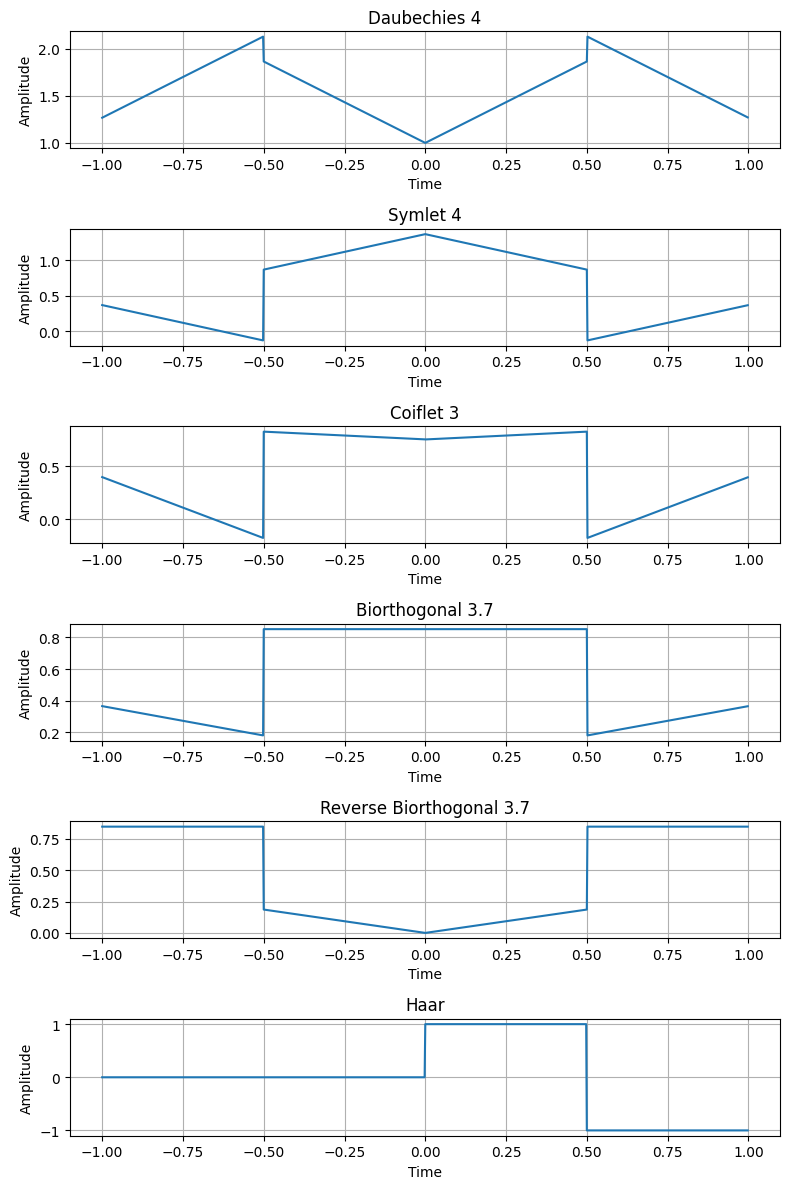

In [11]:
# Define the wavelets to plot


# Define wavelet functions
def daubechies4(x):
    x = np.abs(x)
    return np.where(
        x <= 1 / 2, 1 + np.sqrt(3) * x, np.where(x <= 1, -np.sqrt(3) * x + 3, 0)
    )


def symlet4(x):
    x = np.abs(x)
    return np.where(
        x <= 1 / 2,
        -x + 1 / 2 + np.sqrt(3) / 2,
        np.where(x <= 1, x - 3 / 2 + np.sqrt(3) / 2, 0),
    )


def coiflet3(x):
    x = np.abs(x)
    return np.where(
        x <= 1 / 2,
        3 / 4 + x / 2 - np.sqrt(2) / 4 * x,
        np.where(x <= 1, -3 / 4 + 3 / 2 * x - np.sqrt(2) / 4 * x, 0),
    )


def biorthogonal37(x):
    x = np.abs(x)
    return np.where(x <= 1 / 2, 0.852698, np.where(x <= 1, -0.006244 + 0.371991 * x, 0))


def reverse_biorthogonal37(x):
    x = np.abs(x)
    return np.where(x <= 1 / 2, 0.371991 * x, np.where(x <= 1, -0.006244 + 0.852698, 0))


def haar(x):
    return np.where((x >= 0) & (x < 1 / 2), 1, np.where((x >= 1 / 2) & (x < 1), -1, 0))

wavelets = [
    {"name": "Daubechies 4", "func": lambda x: daubechies4(x)},
    {"name": "Symlet 4", "func": lambda x: symlet4(x)},
    {"name": "Coiflet 3", "func": lambda x: coiflet3(x)},
    {"name": "Biorthogonal 3.7", "func": lambda x: biorthogonal37(x)},
    {"name": "Reverse Biorthogonal 3.7", "func": lambda x: reverse_biorthogonal37(x)},
    {"name": "Haar", "func": lambda x: haar(x)},
]

# Generate x-values for plotting
x = np.linspace(-1, 1, 1000, endpoint=False)

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(wavelets), ncols=1, figsize=(8, 12))

# Loop through each wavelet
for i, wavelet in enumerate(wavelets):
    y = wavelet["func"](x)

    # Plot the wavelet function
    axes[i].plot(x, y)
    axes[i].set_title(wavelet["name"])
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()